In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

In [3]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_scratch/pseudo"

SESSIONS_PATH = "/data/patrick_scratch/sessions/valid_sessions_rpe.pickle"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

FileNotFoundError: [Errno 2] No such file or directory: '/data/patrick_scratch/pseudo/subpop_Color_Correct_test_accs.npy'

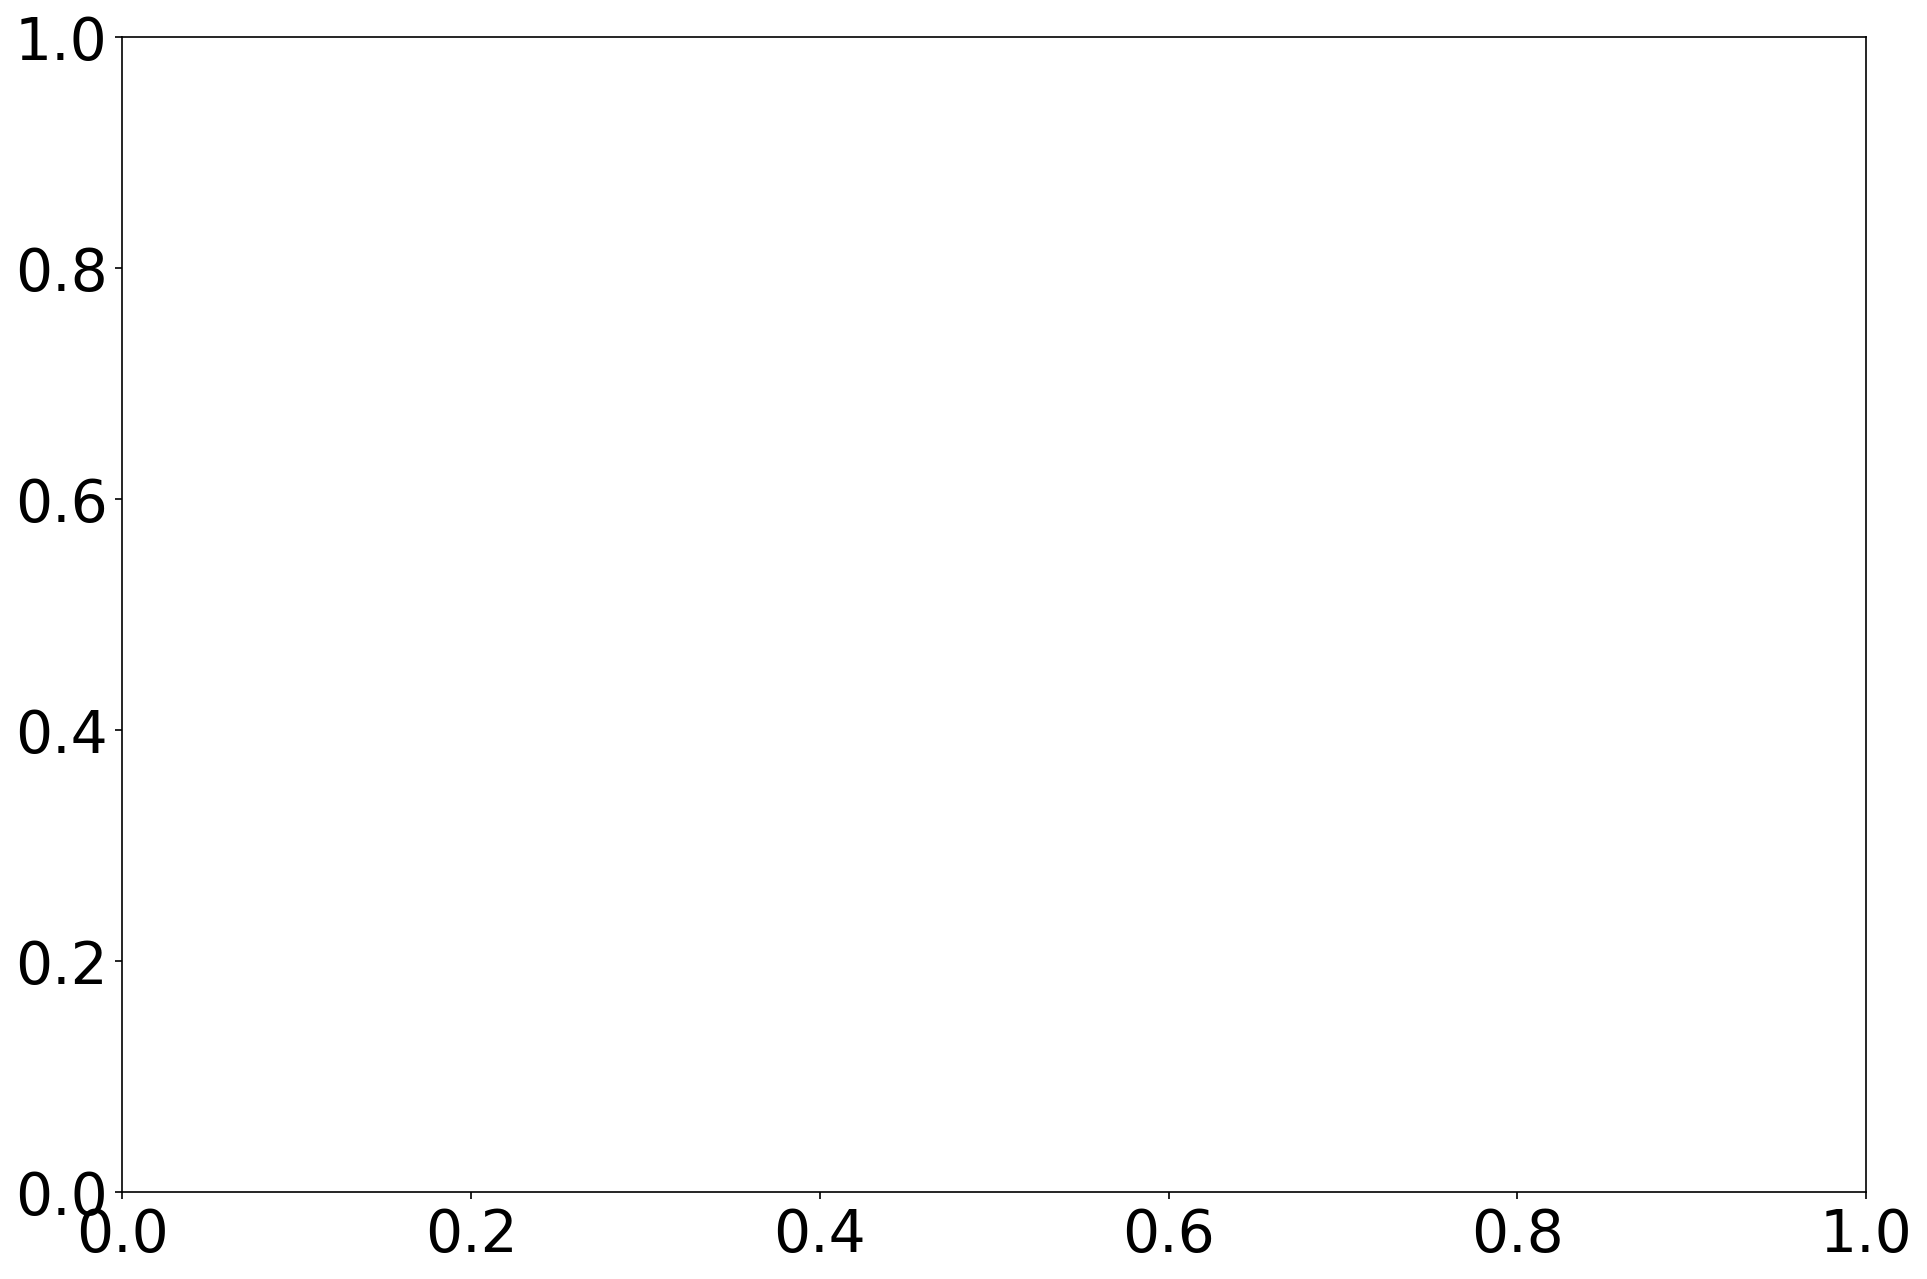

In [4]:
matplotlib.rcParams.update({'font.size': 28})
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))

    cor_accs = np.load(os.path.join(OUTPUT_DIR, f"subpop_{feature_dim}_Correct_test_accs.npy"))
    inc_accs = np.load(os.path.join(OUTPUT_DIR, f"subpop_{feature_dim}_Incorrect_test_accs.npy"))
    all_accs = np.load(os.path.join(OUTPUT_DIR, f"subpop_{feature_dim}_All_test_accs.npy"))

    # plots the mean and standard deviation of decoding accuracy across splits, by time. 
    # visualization_utils.visualize_accuracy_across_time_bins(
    #     all_accs,
    #     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    #     ax,
    #     label=f"{feature_dim} All",
    #     right_align=True, 
    # )
    visualization_utils.visualize_accuracy_across_time_bins(
        cor_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Corrects",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        inc_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Incorrects",
        right_align=True, 
    )
    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### plot out the population, where are these neurons
For each feature dim, plot where are neurons in all, in cor, in inc